In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
np.set_printoptions(suppress=True)
import textwrap
import unicodedata

try:
    from rb_cqed import *
    print("Imported rb_cqed from system.")
except:
    import os
    os.chdir('../../')
    from rb_cqed.rb_cqed import *
    print("rb_cqed not found on system, importing from file.")

Imported rb_cqed from system.


# Contents
* [1.1 Vacuum Rabi oscillations](#sec_1_1)
* [1.2 Rabi oscillations](#sec_1_2)
* [1.3 v-Stirap](#sec_1_3)
    * [1.3.1 Python-defined pulse shapes](#sec_1_3_1)
    * [1.3.2 C-defined pulse shapes](#sec_1_3_2)
* [1.4 Spontaneous emission](#sec_1_4)
* [1.5 Customising the atom](#sec_1_5)
    * [1.5.1 Configured energy levels](#sec_1_5_1)
    * [1.5.2 Configured transition strengths](#sec_1_5_2)
    * [1.5.3 Sink state](#sec_1_5_3)
* [1.6 Customising the simulation](#sec_1_6)
    * [1.6.1 Reconfigurable parameters](#sec_1_6_1)

# Section 1 - Simple 4-level atom

Here are some simple tests demonstrating a simple 4-level atom:
	- Three ground levels: 'gM', 'g', 'gP' with magnetic states -1, 0, +1 respectively.
	- One excited level: 'x' with magnetic state 0.
	- The transition strength between all ground levels and the exicted level are equal.

### 1.1 Vacuum Rabi oscillations
<a id='sec_1_1'></a>

With no spontaneous emission, and g > $\kappa$ we observe a damped oscillation on the cavity coupled transition.

In [2]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.655 seconds.


In [3]:
psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

Running simulation with 501 timesteps...finished in 0.117 seconds


(<Figure size 864x198 with 2 Axes>, <Figure size 864x198 with 1 Axes>)

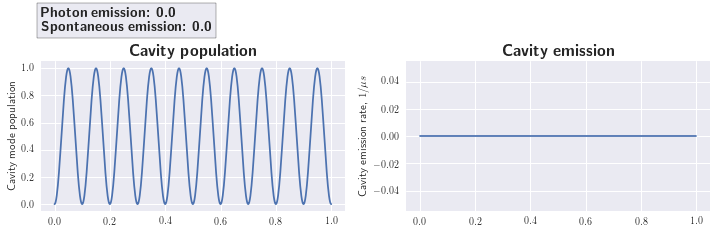

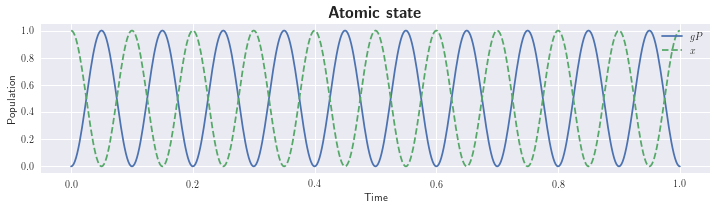

In [4]:
results.plot(['gP', 'x'])

Detuning the cavity from resonance results in smaller Rabi osciallations at a higher frequency.

A pre-compiled Hamiltonian is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.083 seconds


(<matplotlib.figure.Figure at 0x1247be208>,
 <matplotlib.figure.Figure at 0x121bc3550>)

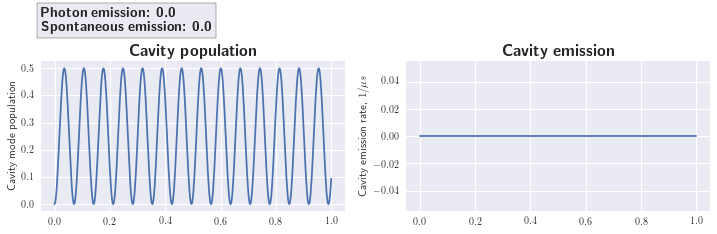

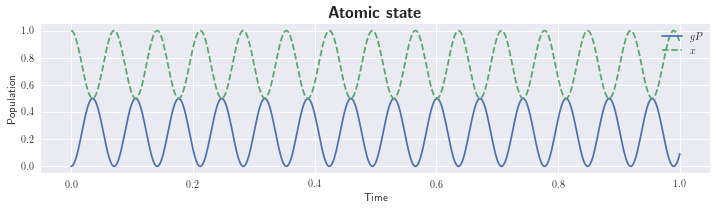

In [5]:
cavity_coupling.deltaC = 10 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot(['gP', 'x'])

The Rabi oscillations can be damped by both cavity decay ($\kappa$) and spontaneous emission ($\gamma$).

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.58 seconds.
Running simulation with 501 timesteps...finished in 0.084 seconds


(<matplotlib.figure.Figure at 0x121c82160>,
 <matplotlib.figure.Figure at 0x124e33518>)

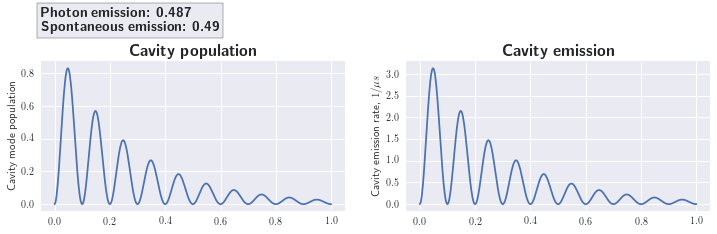

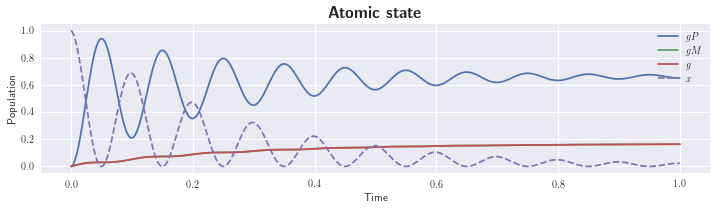

In [6]:
atom4lvl.gamma = 0.3 * 2*np.pi
cav.kappa = 0.3 * 2*np.pi
cavity_coupling.deltaC = 0 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.2 Rabi oscillations
<a id='sec_1_2'></a>

Of course we can drive Rabi oscillations with a laser too.

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	Found suitable _States obj for setup.
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.788 seconds.
Running simulation with 501 timesteps...finished in 0.116 seconds


(<matplotlib.figure.Figure at 0x121fc7438>,
 <matplotlib.figure.Figure at 0x1256d4ef0>)

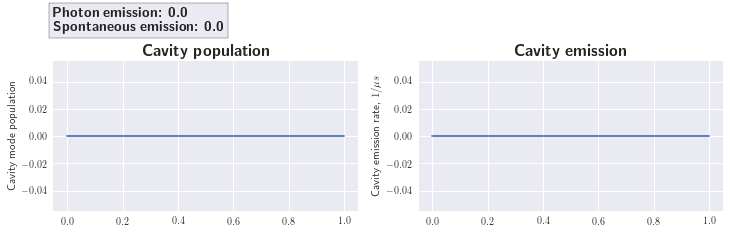

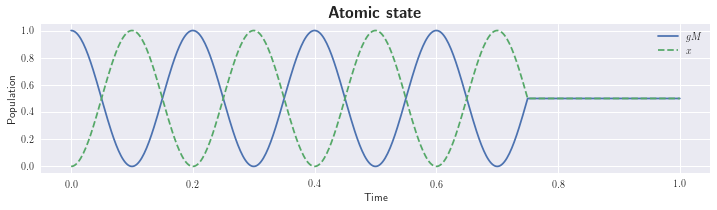

In [7]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)


# Our pulse will be on for 0.75us and then switch off.
# Note that couple_off_resonance=False means we only consider the 'gM' <-> 'x' transition coupled.
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(['gM', 'x'])

Now let's see what happens if we don't magically ignore other transitions the laser (which drives both $\sigma^{+}$ and $\sigma^{-}$ transitions) can couple.

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	Found suitable _States obj for setup.
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.004 seconds.
Running simulation with 501 timesteps...finished in 0.161 seconds


(<matplotlib.figure.Figure at 0x124db2160>,
 <matplotlib.figure.Figure at 0x125e07e48>)

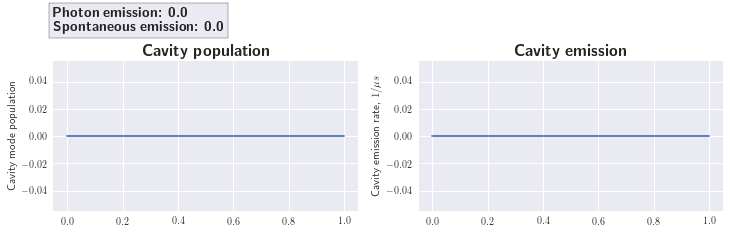

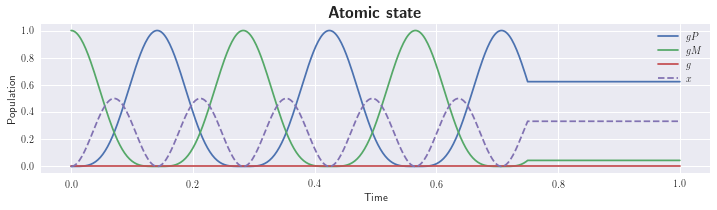

In [8]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True # <-- This is the change!
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Now let's also couple $\pi$ transitions and, for fun, start with a random population distribution across the three ground levels.

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	Found suitable _States obj for setup.
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.225 seconds.
Running simulation with 501 timesteps...finished in 0.18 seconds


(<matplotlib.figure.Figure at 0x122364198>,
 <matplotlib.figure.Figure at 0x126125d68>)

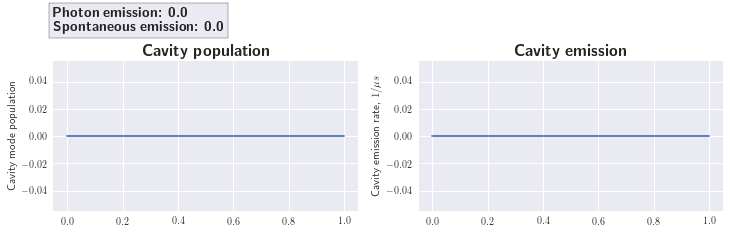

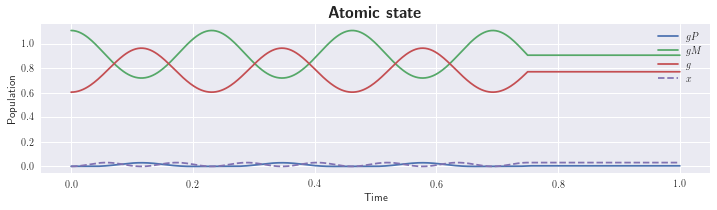

In [9]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,0,-1],  # <-- Let's couple pi transitions too!
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

v = np.random.randn(3)
v /= np.sqrt(np.linalg.norm(v))

psi0 = v[0]*runner.ket('gM',0) + v[1]*runner.ket('g',0) + v[2]*runner.ket('gP',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.3 v-Stirap
<a id='sec_1_3'></a>

##### 1.3.1 Python-defined pulse shapes
<a id='sec_1_3_1'></a>

A v-Stirap process requires a shaped (i.e. time-dependent) laser pulse.  This controlled provided by the 'pulse_shape' argument of a LaserCoupling.  'pulse_shape' takes a string that defines a function of 't' -- the time -- that returns the pulse value at each timestep.  The total laser power at time 't' will then be 'omega0'*'pulse_shape(t)'.  Any additional (non-time dependet) arguments to be passed to the pulse_shape function are passed in the 'args_ham' dictionary.

These time-dependent coupling strengths are, at the back-end, realised with the ['String Format Method' of 'Solving Problems with Time-dependent Hamiltonians' from the QuTip](http://qutip.org/docs/latest/guide/dynamics/dynamics-time.html) and details fo the allowed functions can be found in the link.

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.078 seconds.
Running simulation with 501 timesteps...finished in 0.117 seconds


(<matplotlib.figure.Figure at 0x121a204e0>,
 <matplotlib.figure.Figure at 0x12649ada0>)

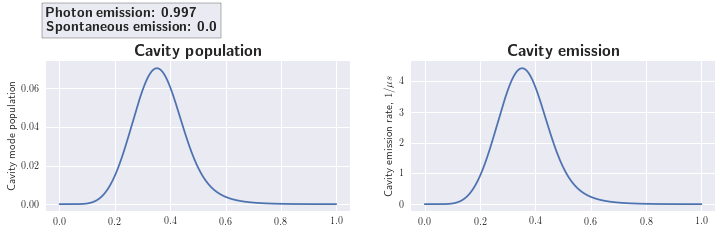

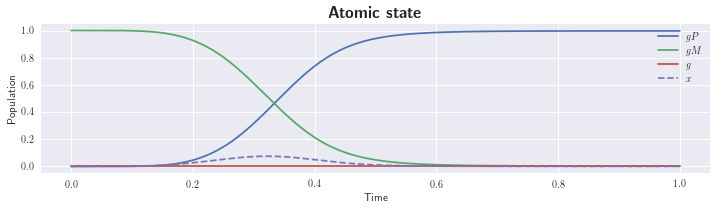

In [10]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

length_pulse = 1
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [np.sin((np.pi/length_pulse)*t)**2,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

##### 1.3.2 C-defined pulse shapes
<a id='sec_1_3_2'></a>

The pulses can alternatively be defined by pure C-code that for an additional speed boost.  To do this we need to define the C-function in the .pyx file from which the Hamiltonian is compiled, and have the 'pulse_shape' call this C-function.  Once again addtional arguments to pass to the C_function can be passed in the 'args_ham' dictionary.

Setting up the .pyx file to provide the custom C-function is handled with the 'setup_pyx' and 'add_pyx' arguments.  Each is a list of strings, with those in 'setup_pyx' added at the top of the file before the imports (so this can be used if you want to import addtional libraries) and 'add_pyx' added after the imports (so this can be used to add extra functions to be callable from the main solver, such as your pulse shape).

As an example we will re-run the above simualtion, but with the laser pulse provided by a C-function.  The speed-up in this case is modest if at all, however the 'pulse_shape' function is called at every timestep for every configured coupling, and so for simulations with finer resolution or, particualrly, more couplings (such as when considering all off-resonant couplings in a more complex atomic structure like 87Rb), C-defined pulses can be considerably more efficient.

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	Found suitable _States obj for setup.
	additional setup required:
		preparing .pyx file with rhs_prepare(...)...
		customising .pyx file...
		compiling Cython function with rhs_compile...done.
	The pyx file was deleted after compilation.  Complete in 3.92 seconds.
Running simulation with 501 timesteps...finished in 0.088 seconds


(<matplotlib.figure.Figure at 0x12611e748>,
 <matplotlib.figure.Figure at 0x126808550>)

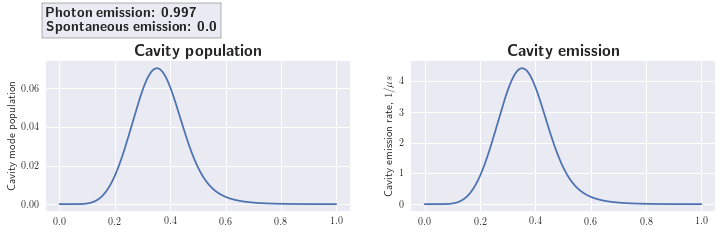

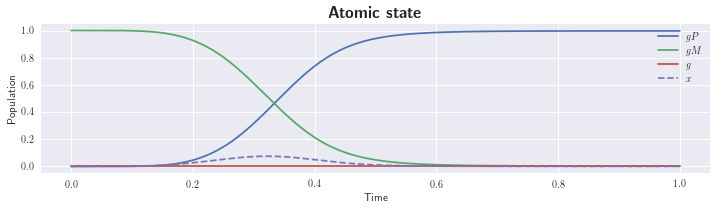

In [11]:
pulse_c_str = \
'''
@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
cdef double complex pulse_c(float t, float t_start, float t_end, float omega):
    if t_start<=t<=t_end: return sin(omega*(t-t_start))**2
    else: return 0
'''

length_pulse = 1
w_pulse = np.pi / length_pulse

laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='pulse_c(t, 0, length_pulse, w_pulse)',
                               args_ham={"length_pulse":length_pulse,
                                         "w_pulse":w_pulse},
                               setup_pyx=[''],
                               add_pyx=[pulse_c_str],
                               couple_off_resonance=False)

runner = ExperimentalRunner(atom4lvl,cav,laser_coupling,cavity_coupling,True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.4 Spontaneous emission
<a id='sec_1_4'></a>

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.685 seconds.
Running simulation with 501 timesteps...finished in 0.075 seconds


(<matplotlib.figure.Figure at 0x121c0db70>,
 <matplotlib.figure.Figure at 0x1266682b0>)

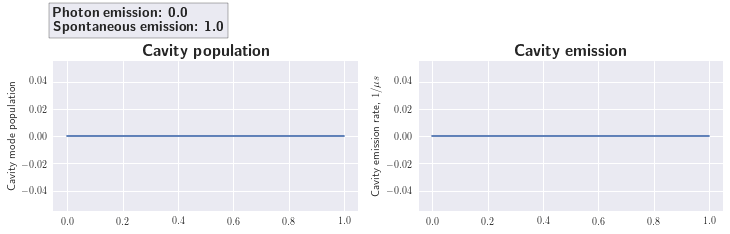

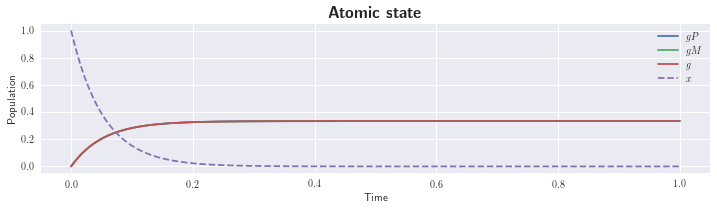

In [12]:
atom4lvl = Atom4lvl(gamma=3*np.pi)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.5 Customising the atom
<a id='sec_1_5'></a>

Here we demonstrate how the atom object can be modified.

#####  1.5.1 Configured energy levels
<a id='sec_1_5_1'></a>

As introduced above, the Atom4lvl has three ground states and one excited state, and so is already a fairly simple system.  However, if you want to further reduce the system a subset of the these levels can be configured by the 'configured_states' parameter.

It is also possible to directly modify the 'g_states' and 'x_states' dictionaries, however this is duplicated functionality with 'configured_states' and so the use of the later is recommended.

In [7]:
atom2lvl = Atom4lvl(gamma=0, configured_states=['gP','x'])
atom4lvl = Atom4lvl(gamma=0)

for atom, n_lev in zip([atom2lvl, atom4lvl],[2,4]):
    print('atom{}lvl'.format(n_lev))
    print('\t', atom.g_states, atom.x_states)
    print('\t', atom.transition_strengths)

atom2lvl
	 {'gP': 0} {'x': 1}
	 {'x': {'gP': 1}}
atom4lvl
	 {'gM': 0, 'g': 1, 'gP': 2} {'x': 3}
	 {'x': {'gM': 1, 'g': 1, 'gP': 1}}


In [22]:
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)


runner2lvl = ExperimentalRunner(atom=atom2lvl,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

runner4lvl = ExperimentalRunner(atom=atom4lvl,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

A pre-compiled Hamiltonian is suitable to run this experiment.
A pre-compiled Hamiltonian is suitable to run this experiment.


For 2-level system we have the following interaction Hamiltonians and results:
[[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  0.]], 'g0_gPx * cos(omegaC_gPx*t)'], [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]], 'g0_gPx * sin(omegaC_gPx*t)']]
Running simulation with 501 timesteps...finished in 0.079 seconds


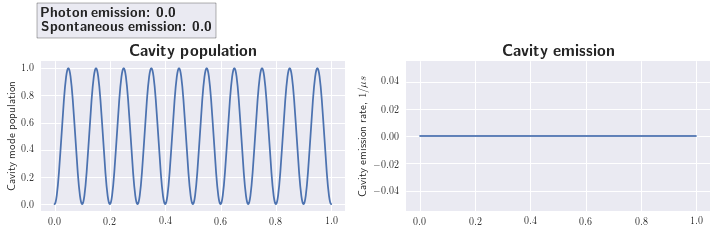

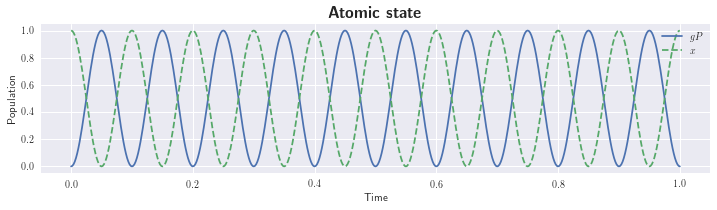

In [23]:
print('For 2-level system we have the following interaction Hamiltonians and results:')

print(runner2lvl.compiled_hamiltonian.hams)

psi0 = runner2lvl.ket('x',0)
t_length = 1
n_steps = 501

results = runner2lvl.run(psi0, t_length, n_steps)

results.plot()

For 4-level system we have the following interaction Hamiltonians and results:
[[Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]], 'g0_gPx * cos(omegaC_gPx*t)'], [Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-1.j  0.+0.j]
 [ 0.+0.j  

(<matplotlib.figure.Figure at 0x1270b3898>,
 <matplotlib.figure.Figure at 0x1215c31d0>)

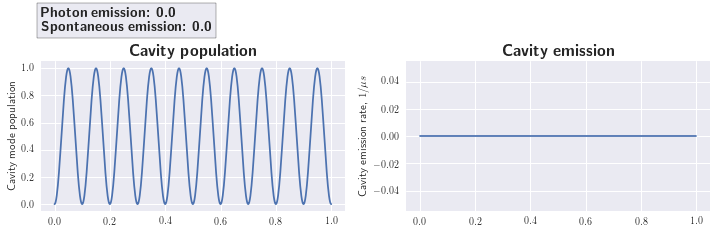

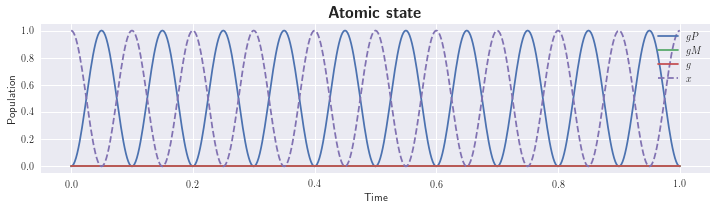

In [33]:
print('For 4-level system we have the following interaction Hamiltonians and results:')

print(runner4lvl.compiled_hamiltonian.hams)

psi0 = runner4lvl.ket('x',0)
t_length = 1
n_steps = 501

results = runner4lvl.run(psi0, t_length, n_steps)

results.plot()

#####  1.5.2 Configured transition strengths
<a id='sec_1_5_2'></a>

The transtion strengths (proporional to the reduced dipole moment squared) determine the effective coupling strength on different transitions, and the relative rates of spontaneous emission on each channel.

In [18]:
atomA = Atom4lvl(gamma=0, transition_strengths={'x':{'gM':0,'g':0,'gP':0.5}})
atomB = Atom4lvl(gamma=0, transition_strengths={'x':{'gM':1,'g':1,'gP':1}})

cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)


runnerA = ExperimentalRunner(atom=atomA,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

runnerB = ExperimentalRunner(atom=atomB,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.772 seconds.
A pre-compiled Hamiltonian is suitable to run this experiment.


So we see that the Rabi frequency is halfed on the transition with half the coupling strength...

Running simulation with 501 timesteps...finished in 0.078 seconds
Running simulation with 501 timesteps...finished in 0.078 seconds


(<matplotlib.figure.Figure at 0x12571fac8>,
 <matplotlib.figure.Figure at 0x1278a7668>)

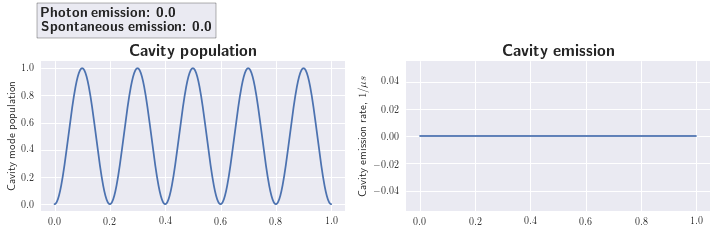

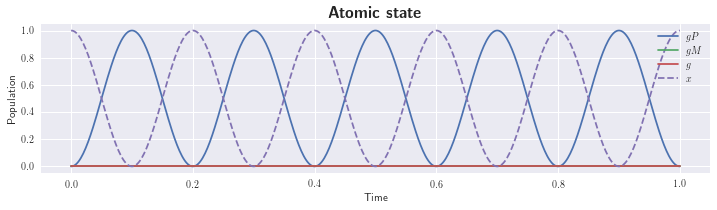

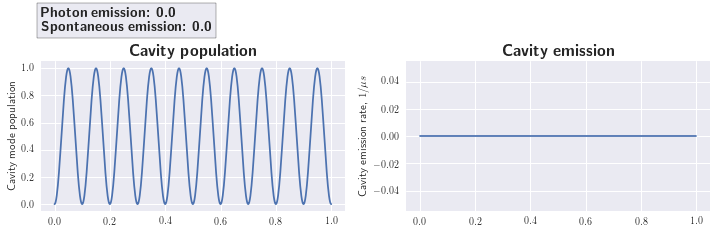

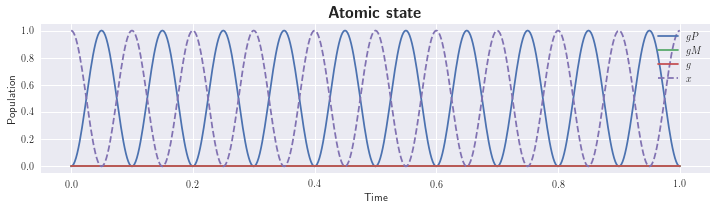

In [19]:
psi0 = ['x',0]
t_length = 1
n_steps = 501

runnerA.run(psi0, t_length, n_steps).plot()
runnerB.run(psi0, t_length, n_steps).plot()

Turning off the cavity coupling, and turing on atomic decay we also see how spontaneous decay is effected.  We note that the transition strength does (of course) effect the overall rate of spontaneous emission on that channel, however it is automatically assumed that all spontaneous emission must go somewhere in our system, i.e. the dissipative terms in our system -- namely spontaneous emission and cavity decay -- are couplings between states rather than losses from the system.  In the former case this is a coupling between atomic states
	|x-state, n_cav> -> |g_state, n_cav>,
and the later case is realised with
	|atom_state, n_cav> -> |atom_state, n_cav - 1>.
Practically this means the branching ratios of the allowed spontaneous emission channels are always adjusted such that they sum to one.

*Note of warning*

As the rate of decay of the atomic amplitude, $\gamma$, is defined in the atom, changing the values 'transition_strength' will not alter the total rate of spontanoues emission from the excited state - only the relative branching ratios of the decay.  In contrast, when the 'transition_strength' is changed, the response of the atom to an external field (be it a cavity coupling or a laser coupling), will also change (as we have just seen above).

In [20]:
for atom, lab in zip([atomA, atomB],['A','B']):
    print('For atom{}'.format(lab))
    atom.gamma = 0.1*2*np.pi
    print('\tTransition strengths: ', atom.transition_strengths)
    print('\tSpontaneous emission branching ratios: ', list(atom.get_spontaneous_emission_channels()))

For atomA
	Transition strengths:  {'x': {'gM': 0, 'g': 0, 'gP': 0.5}}
	Spontaneous emission branching ratios:  [('gM', 'x', 0.0), ('g', 'x', 0.0), ('gP', 'x', 1.0)]
For atomB
	Transition strengths:  {'x': {'gM': 1, 'g': 1, 'gP': 1}}
	Spontaneous emission branching ratios:  [('gM', 'x', 0.3333333333333333), ('g', 'x', 0.3333333333333333), ('gP', 'x', 0.3333333333333333)]


No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.053 seconds.
No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.686 seconds.
Running simulation with 501 timesteps...finished in 0.079 seconds
Running simulation with 501 timesteps...finished in 0.069 seconds


(<matplotlib.figure.Figure at 0x1216d1400>,
 <matplotlib.figure.Figure at 0x1251fa0b8>)

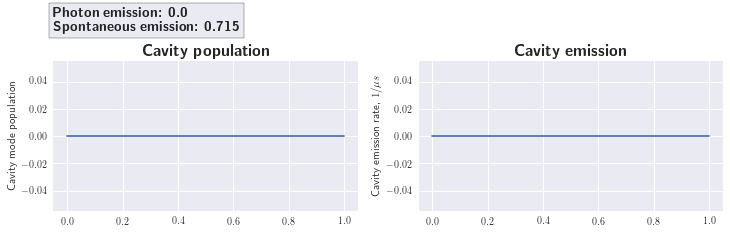

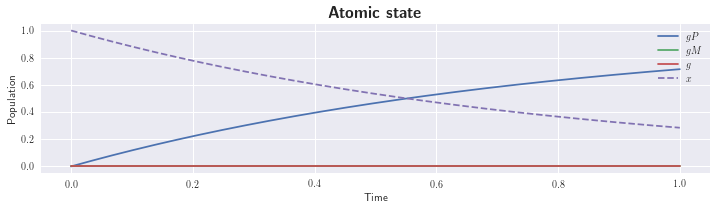

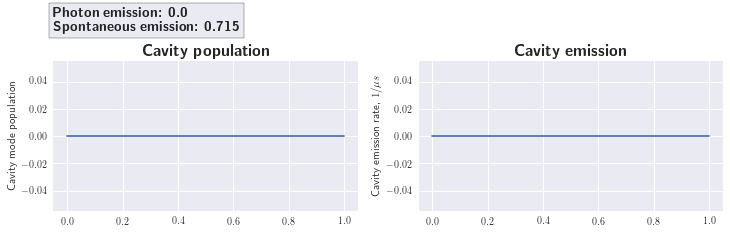

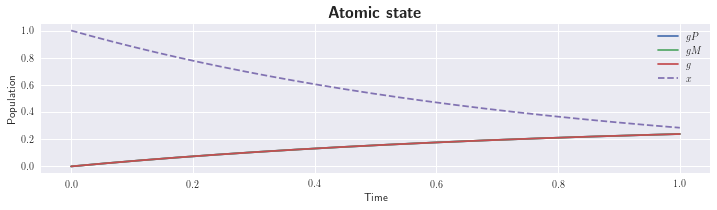

In [21]:
runnerA = ExperimentalRunner(atomA,cav,[],[],verbose=True)
runnerB = ExperimentalRunner(atomB,cav,[],[],verbose=True)

psi0 = ['x',0]
t_length = 1
n_steps = 501

resultsA = runnerA.run(psi0, t_length, n_steps)
resultsB = runnerB.run(psi0, t_length, n_steps)

resultsA.plot()
resultsB.plot()

We can check this is doing what we expect.  The excited state population is expected to decay exponentially at a rate $\Gamma=2\gamma$.  So for each atom let's calculate the expected and the simulated population remaining in the excited state after the simulation.

In [22]:
for lab, atom, res in zip(['A','B'],[atomA,atomB],[resultsA, resultsB]):
    print(textwrap.dedent('''\
    For atom{0}, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)={1} ({2}).\
    '''.format(*([lab] + [np.round(x,3) for x in [np.exp(-2*atom.gamma*t_length), res.get_atomic_population('x',-1)[0]]]))))

For atomA, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)=0.285 (0.285).    
For atomB, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)=0.285 (0.285).    


#####  1.5.3 Sink state
<a id='sec_1_5_3'></a>

Another way we can customise the atom is with Atom4lvl.sink_state option.  This option can be set to any one of the ground states -- 'gM','g' or 'gP' -- and sets it to be a so-called 'sink', i.e. all spontaneous emission is directed to this state and there is no coupling from this state to any other state.

The below example demonstrates this in action with two atoms, AtomA and AtomB, the former of which has 'g' set as the sink state.  We then drive Rabi osciallations between all three ground levels and the excited state with a laser pulse, which are damped by spontanoues emission.  For AtomA, all this spontaneous emission is directed to state 'g', which also is not coupled by the laser pulse due to the active decoupling of sink states from all other levels.  AtomB exhibits equal spontaneous emission into, and equal Rabi oscillations in the populations of, all three ground levels.

In [23]:
atomA = Atom4lvl(gamma=0.2*2*np.pi, sink_state='g')
atomB = Atom4lvl(gamma=0.2*2*np.pi)

cav = Cavity(g = 5 * 2.*np.pi,kappa = 0. * 2.*np.pi)

length_pulse = 0.75

laser_coupling = LaserCoupling(omega0=5 * 2.*np.pi,
                               g='g', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,0,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True)


runnerA = ExperimentalRunner(atom=atomA,
                                cavity=cav,
                                laser_couplings=laser_coupling,
                                cavity_couplings=[],
                                verbose=True)

runnerB = ExperimentalRunner(atom=atomB,
                                cavity=cav,
                                laser_couplings=laser_coupling,
                                cavity_couplings=[],
                                verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.367 seconds.
No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.346 seconds.


Running simulation with 501 timesteps...finished in 0.187 seconds
Running simulation with 501 timesteps...finished in 0.213 seconds


(<matplotlib.figure.Figure at 0x124da1eb8>,
 <matplotlib.figure.Figure at 0x126457908>)

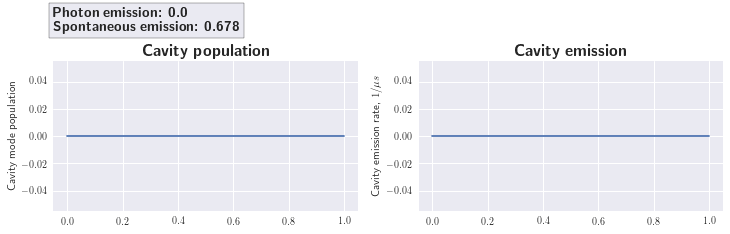

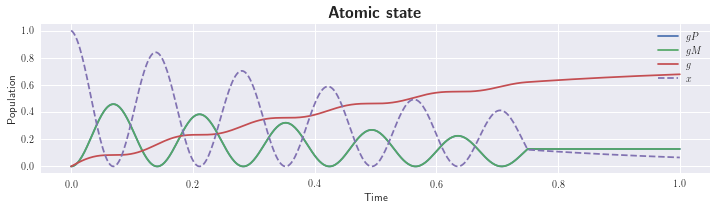

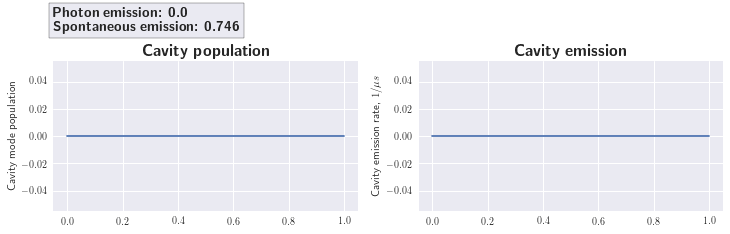

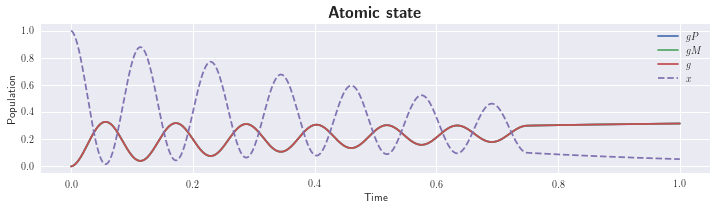

In [24]:
psi0 = ['x',0]
t_length = 1
n_steps = 501

runnerA.run(psi0, t_length, n_steps).plot()
runnerB.run(psi0, t_length, n_steps).plot()

Note:  The total spontaneous emission is less with a sink state configured as all decaying atomic amplitiude remains dark, as oppose to the other atom where the atom can decay into a group state, be re-excited and decay again.

###  1.6 Customising the simulation
<a id='sec_1_6'></a>

Under the hood, we are using the '''Qutip.mesolve''' '''package.function''' to simulate the Hamiltonian.  A lot of work goes on to compile the Hamiltonian into the correct form and minimise the amount of recomputation, for e.g. of number operators, state vectors etc, required to run multiple experiments.  Mostly this is all done automatically and shouldn't effect the use of the API, however it is in some cases noticable.  In particular the extra time (typically ~3-5 seconds) required to compile the Hamiltonian into C-code the first time it is run.

#####  1.6.1 Reconfigurable parameters
<a id='sec_1_6_1'></a>

Certain parameters, those passed in the argument:value dictionary args_ham under the covers, can be changed without requiring a new Hamiltonian to be compiled.  Each term of the Hamiltonian that takes an argument specified at run time (which by necessity must include all time-dependent terms) must be passed in and simulated as independently of the other terms.  As such, the trade off is between having an argument reconfigurable without altering the Hamiltonian .pyx file, to avoid the overhead of re-compilation, vs having an arguemnt static, which allows more terms of the Hamiltonian to be grouped together and therefore faster simulations for _every_ run.

To see the reconfiguarble parameters, call the _eq_ignore_fields() method on the DataClasses that specify our system: AtomXXX, CavityXXX, LaserCoupling and CavityCoupling.  These are ignored when considering if two such objects are 'the same' as they are reconfiguarable at run time.

In [25]:
for dc in [Atom4lvl(), Cavity(), LaserCoupling(0,'g','x',0,0,{}), CavityCoupling(0,'g','x',0,0)]:
    print(dc._eq_ignore_fields())

[]
['g']
['omega0', 'deltaL', 'args_ham']
['g0', 'deltaC']


Additionally, it is also possible to specify that the decay rates in the system (atomic amplitude decay, $\gamma$, and cavity field decay, $\kappa$) are reconfigurable - i.e. can be changed without recompiling the Hamiltonian.  This is controlled by the 'reconfigurable_decay_rates' flag in the ExperimentalRunner.  This can be useful if running simulations with many different $\gamma$'s anf $\kappa$'s, however each individual simulation will be slightly slower than if hard-coding the decay rates into the Hamiltonian (though this is not noticable for systems with simple decay dynamincs such as the non-birefringent cavity and two-level atom used in the below example).

In [26]:
kappa1, kappa2 = 0, 3

atom4lvl = Atom4lvl(gamma=0, configured_states=['x','gP'])
cav = Cavity(g=3 * 2*np.pi, kappa=kappa1 * 2*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

t_length = 1
n_steps = 501

results_list = []

pi_str = unicodedata.lookup("GREEK SMALL LETTER PI")
kappa_str = unicodedata.lookup("GREEK SMALL LETTER KAPPA")

for rdr, label in zip([False, True],
                      ['static decay rates', 'reconfigurable decay rates']):
    for kappa in [kappa1, kappa2]:
        print('\n\nWith {0} with {2}/2{3}={1}MHz:'.format(label, kappa, kappa_str, pi_str), end='\n\n')
        
        cav.kappa = kappa
        runner = ExperimentalRunner(atom4lvl,cav,[],cavity_coupling,verbose=True,
                                    reconfigurable_decay_rates=rdr)
        psi0 = runner.ket('x',0)
        results = runner.run(psi0, t_length, n_steps)
        results_list.append(results)



With static decay rates with κ/2π=0MHz:

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.924 seconds.
Running simulation with 501 timesteps...finished in 0.081 seconds


With static decay rates with κ/2π=3MHz:

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 3.84 seconds.
Running simulation with 501 timesteps...finished in 0.079 seconds


With reconfigurable decay rates with κ/2π=0MHz:

No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	Found suitable _States obj for setup.
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.103 seconds.
Running simulation with 501 timesteps...finis

#####  1.6.2 Verbosity
<a id='sec_1_6_2'></a>

The verbose flag does what you expect really, it changes how much information is printed.

In [29]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

print('With verbose=True:')
runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)
runner.run(['x',0],1,101)

print('With verbose=False:')
runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=False)
runner.run(['x',0],1,101)
print('done.')

With verbose=True:
A pre-compiled Hamiltonian is suitable to run this experiment.
Running simulation with 101 timesteps...finished in 0.036 seconds
With verbose=False:
done.


#####  1.6.2 Saving compiled .pyx files
<a id='sec_1_6_2'></a>

To run the simulations we generate a .pyx file containing the relevent C-calls before compiling this into an executable.  Once compiled the pyx file can be deleted without impacting the ability to call these executables, and so by defulat they are deleted.  It can be useful for troubleshooting purposes (especially when defining a custom laser pulse with a C-function as described in [1.3.2](#sec_1_3_2)) to preserve the files and this can be specified by the 'ham_pyx_dir' argument of an ExperimentalRunner().

* If ham_pyx_dir=None, the pyx file will be deleted after compilation (this is the default behaviour).
* Otherwise the new pyx file will be created and stored in the directory specified by ham_pyx_dir.  The directory will be created if it doesn't already exist.

In [28]:
atom4lvl = Atom4lvl()
cav = Cavity()

cavity_coupling = CavityCoupling(cav.g,g='gP',x='x',deltaC=0,deltaM=[1,-1])

print('With ham_pyx_dir=None:')
runner = ExperimentalRunner(atom4lvl,cav,[],cavity_coupling,
                            verbose=True,
                            ham_pyx_dir=None)

print('\nWith ham_pyx_dir=compiled-hamiltonian-pyx-files:')
atom4lvl=Atom4lvl(configured_states=['x','gP']) # tweaking atom so a fresh Hamiltonian needs to be compiled.

runner = ExperimentalRunner(atom4lvl,cav,[],cavity_coupling,
                            verbose=True,
                            ham_pyx_dir='compiled-hamiltonian-pyx-files')

With ham_pyx_dir=None:
No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...done.
	The pyx file was deleted after compilation.  Complete in 4.072 seconds.

With ham_pyx_dir=compiled-hamiltonian-pyx-files:
No suitable pre-compiled Hamiltonian found.  Generating and compiling Cython file...
	compiling Cython function with rhs_generate(...)...creating directory for Hamiltonian pyx file at compiled-hamiltonian-pyx-files...moving pyx file...done.
	New file is ExperimentalRunner_Hamiltonian_18_13148.pyx.  Complete in 3.994 seconds.
